<a href="https://colab.research.google.com/github/rghimre3/INFO5505_Machine_Learning_for_Data_Scientist/blob/main/INFO5505_Linear_Regression_(Assignment_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO5505_Machine_Learning_for_Data_Scientist 

Linear Regression (Assignment 1) 

@Ramesh Ghimire


In [43]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt


In [5]:
#reading the data from gitlab
df=pd.read_csv("https://raw.githubusercontent.com/rghimre3/INFO5505_Machine_Learning_for_Data_Scientist/main/monet.csv")

In [30]:
#cheking fist 5 observation and checking shape, data types and info
print(df.head(20)) 
print("   ")
print(df.shape) 
print("   ")
print(df.describe())
print("   ")
print(df.info)

       PRICE  HEIGHT  WIDTH  SIGNED  PICTURE  HOUSE 
0   3.993780    21.3   25.6       1        1       1
1   8.800000    31.9   25.6       1        2       2
2   0.131694     6.9   15.9       0        3       3
3   2.037500    25.7   32.0       1        4       2
4   1.487500    25.7   32.0       1        4       2
5   1.870000    25.6   31.9       1        4       1
6   5.282500    25.5   35.6       1        5       1
7   5.065750    26.0   34.3       1        5       2
8   1.375000    25.6   36.2       1        5       2
9   2.530000    25.6   36.4       1        6       2
10  3.742500    25.6   36.4       1        6       2
11  0.364343    25.6   36.2       1        7       2
12  2.723870    31.9   39.4       1        8       2
13  3.520000    23.6   31.9       1        9       1
14  0.497500    19.5   25.0       1       10       2
15  9.350000    32.7   26.8       1       11       1
16  1.219500    25.5   36.0       1       12       2
17  0.407000    25.6   39.4       1       12  

In [28]:
print(df.dtypes)
# data no need data typecasting 

PRICE      float64
HEIGHT     float64
WIDTH      float64
SIGNED       int64
PICTURE      int64
HOUSE        int64
dtype: object


In [29]:
print(df.isnull().sum())

# there seems no null in the data 

PRICE      0
HEIGHT     0
WIDTH      0
SIGNED     0
PICTURE    0
HOUSE      0
dtype: int64


ValueError: ignored

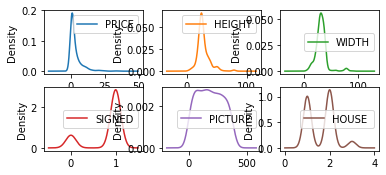

In [42]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)



In [ ]:
df.plot(kind='scatter', x='my_column_1', y='my_column_2', c='my_column_3', cmap='viridis')

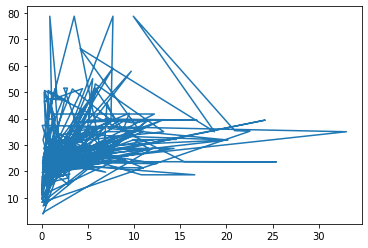

In [45]:
plt.plot(df['PRICE'],df['HEIGHT'])